In [138]:
# Q1
def evaluate_hand(hand):
  if type(hand)==list:
    if len(hand) != 5:
        # print( "Error! Please enter a valid hand")
        return None

    values = []
    suits = []

    # Create a dictionary to map card values to integers
    card_values = {
        '2': 2, 
        '3': 3, 
        '4': 4, 
        '5': 5,
        '6': 6, 
        '7': 7, 
        '8': 8, 
        '9': 9,
        '10': 10, 
        'J': 11, 
        'Q': 12, 
        'K': 13, 
        'A': 14
    }

    for card in hand:
        values_in_hand = [card[0:-1]]
        suits_in_hand = [card[-1]]
        # Check whether cards in hand is valid or not
        if len(card) != 2 and len(card) != 3:
            # print( "Error! Please enter a valid hand")
            return None  
        if card[0:-1] not in card_values:
            # print( "Error! Please enter a valid hand")
            return None
        if card[-1] not in "CDHS":
             # print( "Error! Please enter a valid hand")
            return None

        value, suit = card_values[values_in_hand[0]], suits_in_hand[0]

        values.append(value)
        suits.append(suit)

    values.sort()

    # Check for flush
    if len(set(suits)) == 1:
        # Check for straight flush
        if values == list(range(min(values), max(values)+1)):
            if max(values) == 14:
                return 10 # Royal flush
            else:
                return 9 # Straight flush
        else:
            return 6 # Flush

    # Check for straight
    if values == list(range(min(values), max(values)+1)) or values == [2, 3, 4, 5, 14]:
        return 5 # Straight

    # Check for duplicates
    duplicates = []
    for value in set(values):
        count = values.count(value)
        if count > 1:
            duplicates.append((value, count))
    duplicates.sort(reverse=True)

    if len(duplicates) == 0:
        return 1 # High card
    elif len(duplicates) == 1:
        if duplicates[0][1] == 2:
            return 2 # One pair
        elif duplicates[0][1] == 3:
            return 4 # Three of a kind
        else:
            return 7 # Four of a kind
    elif len(duplicates) == 2:
        if duplicates[0][1] == 3 and duplicates[1][1] == 2:
            return 3 # Full house
        else:
            return 8 # Two pair
    else:
        # print( "Error! Please enter a valid hand")
        return None




# test
# evaluate_hand(['10S','8S','JC','KS','10D'])



import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%204/cards.csv')
number_of_hands= len(df)
print(f"There are {number_of_hands} hands in the given dataset")

def evaluate_all_hands(file_name):
    total_score = 0
    # Apply the evaluate_hand function to each row
    for row in df.itertuples(index=False):
        # Filter out hands with a None value
        hand = [card.strip() for card in row if pd.notna(card)]
        score = evaluate_hand(hand)
        # Calculate the sum of the scores
        if score is not None:
            total_score += score
    return total_score


total_score = evaluate_all_hands("https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%204/cards.csv")
print(f"Total score is: {total_score}")


There are 300000 hands in the given dataset
Total score is: 347352


# Q1 [Writing question]

To approximate the number of calculations performed by the computer in the code I wrote to solve previous question, we need to consider the number of calculations involved in each operation that is executed by the computer.

In the evaluate_hand function, the following operations involve calculations:

Checking if the input is a list - 1 calculation
Checking if the length of the input is 5 - 1 calculation
Validating each card in the input - up to 15 calculations (checking card length, value and suit)
Converting each card to a value - up to 30 calculations (using if-else statements)
Sorting the list of values - up to 4 calculations (we don't have to count the first time)
Checking for a flush - up to 3 calculation
Checking for a straight -  1 calculations
Checking for duplicates - up to 10 calculations (checking duplicates and counting values)
Returning the hand ranking - 1 calculation
Checking for None value - 1 calculation
The number of calculations performed by the computer will depend on the input and the hand ranking, as not all calculations are performed for every input.

However, to estimate the total number of calculations performed by the computer, we can assume an average of 20 calculations per hand, which includes the input validation and hand ranking computation.

There are 300000 hands in the dataset. We can get this number using len(df) function.

Therefore, the final result will be 20 * 300000 = 6000000.



# Q2-1
# What kinds of analysis could be performed with this data?

With this data, we could perform several types of analyses, including:

1. Descriptive statistics: We could calculate basic statistics such as mean, median, mode, range, and standard deviation for the rent and other features such as number of bedrooms, number of bathrooms, and location.

2. Exploratory data analysis (EDA): We could explore the data to identify any patterns, trends, or outliers. For example, through seaborn library, we could create histograms, scatter plots, or box plots to visualize the distribution of the rent or other features, and see how they relate to each other.

3. Regression analysis: We could build models to predict the price of apartments based on factors such as number of bedrooms, location, and post time.

4. Time series analysis: We could analyze how the rent varies over time by looking at the data over a period of time. This could be used to identify seasonal trends, rental market trends or any other patterns that change over time.

5. Clustering analysis: We could group apartments based on similarities in their features such as location, price, and number of bedrooms.


In [139]:
# Q2-2
import pandas as pd

# Set directory path where CSV files are stored
base_url = "https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%204/apartments/"
csv_files=[]

# Fet a list of all CSV files
for i in range(75):
  csv_files.append(base_url + str(i) +".csv")

# Concatenate all CSV files into a single data frame
df = pd.concat([pd.read_csv(f) for f in csv_files])

# Print the concatenated data frame
df


,title,bedrooms,price,location,post_time
0,Renovated 4 bedroom 2 Bath apartment available in Prime Crown Heights!,4br,"$3,795",crown heights,11 mins ago
1,Private Oasis In Great Neck,1br,"$2,200",great neck,11 mins ago
2,NO FEE!! LARGE 3 BED+ALL UTILITIES INCLUDED (HEAT/HOT WATER AND ELECTR,3br,"$5,500",east village,12 mins ago
3,PRIVATE DECK * RENOVATED HOUSE * WINDOWS * CENTRAL AIR & HEAT *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,12 mins ago
4,IN UNIT WASHER DRYER * CENTRAL AIR & HEAT * HARDWOOD FLOORS *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,13 mins ago
...,...,...,...,...,...
115,"Renovated, Studio Loft in Downtown Yonkers",NaN,"$2,100",yonkers,1/8
116,No Fee Fully furnished 1 bed in brand new luxury building with w/d in,NaN,"$5,500",midtown west,1/8
117,SPACIOUS 1 BED APT,NaN,"$2,700",forest hills,1/8
118,Beautiful Duplex style loft apartment with huge private rooftop,NaN,"$3,500",upper west side,1/8


In [140]:
# Q2-2
# Cleansing price columns
# Get rid of $ sign and ,
df["price_cleaned"]=df["price"].str.replace("$","").str.replace(",","")
# Covert data type for price columns
df["price_cleaned"]=df["price_cleaned"].astype(int)

df

<ipython-input-140-a26d700d970d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price_cleaned"]=df["price"].str.replace("$","").str.replace(",","")


,title,bedrooms,price,location,post_time,price_cleaned
0,Renovated 4 bedroom 2 Bath apartment available in Prime Crown Heights!,4br,"$3,795",crown heights,11 mins ago,3795
1,Private Oasis In Great Neck,1br,"$2,200",great neck,11 mins ago,2200
2,NO FEE!! LARGE 3 BED+ALL UTILITIES INCLUDED (HEAT/HOT WATER AND ELECTR,3br,"$5,500",east village,12 mins ago,5500
3,PRIVATE DECK * RENOVATED HOUSE * WINDOWS * CENTRAL AIR & HEAT *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,12 mins ago,3000
4,IN UNIT WASHER DRYER * CENTRAL AIR & HEAT * HARDWOOD FLOORS *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,13 mins ago,3000
...,...,...,...,...,...,...
115,"Renovated, Studio Loft in Downtown Yonkers",NaN,"$2,100",yonkers,1/8,2100
116,No Fee Fully furnished 1 bed in brand new luxury building with w/d in,NaN,"$5,500",midtown west,1/8,5500
117,SPACIOUS 1 BED APT,NaN,"$2,700",forest hills,1/8,2700
118,Beautiful Duplex style loft apartment with huge private rooftop,NaN,"$3,500",upper west side,1/8,3500


In [141]:
# Q2-2
# Based on the result of following code we can tell that there are some wrong value for price
l1=list(df["price_cleaned"].unique())
print(sorted(l1, reverse=True))

# Print row
pd.options.display.max_colwidth = None
selected_row = df[df['price_cleaned']==17500].iloc[0]
print(selected_row)

[950000, 20095, 19500, 18000, 17955, 17500, 16750, 16500, 15800, 15250, 15000, 12900, 12690, 12500, 12000, 11925, 11500, 11000, 10900, 10800, 10500, 10489, 10000, 9995, 9500, 9100, 8900, 8850, 8800, 8752, 8700, 8500, 8495, 8490, 8485, 8483, 8433, 8400, 8295, 8200, 8036, 8000, 7995, 7900, 7895, 7890, 7860, 7850, 7825, 7800, 7777, 7760, 7750, 7700, 7550, 7500, 7495, 7470, 7450, 7400, 7399, 7395, 7300, 7288, 7250, 7200, 7195, 7150, 7100, 7095, 7000, 6999, 6995, 6990, 6985, 6975, 6950, 6935, 6900, 6840, 6825, 6800, 6780, 6775, 6765, 6738, 6711, 6700, 6600, 6550, 6500, 6495, 6450, 6425, 6410, 6400, 6395, 6390, 6370, 6360, 6350, 6300, 6295, 6250, 6223, 6222, 6220, 6200, 6195, 6184, 6180, 6095, 6065, 6000, 5999, 5995, 5990, 5980, 5963, 5950, 5949, 5945, 5900, 5895, 5857, 5850, 5840, 5800, 5795, 5762, 5750, 5715, 5700, 5699, 5695, 5650, 5600, 5590, 5580, 5570, 5564, 5558, 5550, 5540, 5500, 5499, 5496, 5495, 5490, 5450, 5440, 5424, 5415, 5410, 5400, 5395, 5380, 5375, 5363, 5362, 5350, 5340, 533

In [142]:
# Q2-2
# Extract correct prices from title column
df['correct_price'] = df['title'].str.extract(r'\$(.*?)\s')

# Get rid of $ sign and ,replace 'o' with '0' in the price column
df["correct_price"] = df["correct_price"].str.replace("$", "").str.replace(",", "").str.replace('o', '0')

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Replace incorrect prices with correct prices
df.loc[df['price_cleaned'] < 10, 'price_cleaned'] = df['correct_price']

# covert data type for price columns
df["price_cleaned"] = df["price_cleaned"].astype(float)

# Drop the correct_price column
df.drop(columns=['correct_price'], inplace=True)

df

<ipython-input-142-0c01a5e7dcba>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["correct_price"] = df["correct_price"].str.replace("$", "").str.replace(",", "").str.replace('o', '0')


,title,bedrooms,price,location,post_time,price_cleaned
0,Renovated 4 bedroom 2 Bath apartment available in Prime Crown Heights!,4br,"$3,795",crown heights,11 mins ago,3795.0
1,Private Oasis In Great Neck,1br,"$2,200",great neck,11 mins ago,2200.0
2,NO FEE!! LARGE 3 BED+ALL UTILITIES INCLUDED (HEAT/HOT WATER AND ELECTR,3br,"$5,500",east village,12 mins ago,5500.0
3,PRIVATE DECK * RENOVATED HOUSE * WINDOWS * CENTRAL AIR & HEAT *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,12 mins ago,3000.0
4,IN UNIT WASHER DRYER * CENTRAL AIR & HEAT * HARDWOOD FLOORS *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,13 mins ago,3000.0
...,...,...,...,...,...,...
8995,"Renovated, Studio Loft in Downtown Yonkers",NaN,"$2,100",yonkers,1/8,2100.0
8996,No Fee Fully furnished 1 bed in brand new luxury building with w/d in,NaN,"$5,500",midtown west,1/8,5500.0
8997,SPACIOUS 1 BED APT,NaN,"$2,700",forest hills,1/8,2700.0
8998,Beautiful Duplex style loft apartment with huge private rooftop,NaN,"$3,500",upper west side,1/8,3500.0


In [143]:
# Q2-2
'''
# There are still some null values in the price_cleaned, this is because for those incorrect price value, there is no price information mentioned in the title
# I will take the average value to replace the rest null values
print(df.isnull().sum())
'''

# Calculate the mean of price_cleaned column
mean_price = df['price_cleaned'].mean()

# Fill null values with mean price
df['price_cleaned'].fillna(mean_price, inplace=True)

# covert data type for price columns
df["price_cleaned"] = df["price_cleaned"].astype(int)

df


,title,bedrooms,price,location,post_time,price_cleaned
0,Renovated 4 bedroom 2 Bath apartment available in Prime Crown Heights!,4br,"$3,795",crown heights,11 mins ago,3795
1,Private Oasis In Great Neck,1br,"$2,200",great neck,11 mins ago,2200
2,NO FEE!! LARGE 3 BED+ALL UTILITIES INCLUDED (HEAT/HOT WATER AND ELECTR,3br,"$5,500",east village,12 mins ago,5500
3,PRIVATE DECK * RENOVATED HOUSE * WINDOWS * CENTRAL AIR & HEAT *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,12 mins ago,3000
4,IN UNIT WASHER DRYER * CENTRAL AIR & HEAT * HARDWOOD FLOORS *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,13 mins ago,3000
...,...,...,...,...,...,...
8995,"Renovated, Studio Loft in Downtown Yonkers",NaN,"$2,100",yonkers,1/8,2100
8996,No Fee Fully furnished 1 bed in brand new luxury building with w/d in,NaN,"$5,500",midtown west,1/8,5500
8997,SPACIOUS 1 BED APT,NaN,"$2,700",forest hills,1/8,2700
8998,Beautiful Duplex style loft apartment with huge private rooftop,NaN,"$3,500",upper west side,1/8,3500


In [144]:
# Check null values left
print(df.isnull().sum())

title               0
bedrooms         8585
price               0
location            0
post_time           0
price_cleaned       0
dtype: int64


In [145]:
# Q2-2
# Cleansing bedrooms columns
# Get rid of $ sign and ,
df["bedrooms_cleaned"]=df["bedrooms"].str.replace("br","")
# Covert data type for bedrooms_cleaned columns
df["bedrooms_cleaned"]=df["bedrooms_cleaned"].astype(float)

df

,title,bedrooms,price,location,post_time,price_cleaned,bedrooms_cleaned
0,Renovated 4 bedroom 2 Bath apartment available in Prime Crown Heights!,4br,"$3,795",crown heights,11 mins ago,3795,4.0
1,Private Oasis In Great Neck,1br,"$2,200",great neck,11 mins ago,2200,1.0
2,NO FEE!! LARGE 3 BED+ALL UTILITIES INCLUDED (HEAT/HOT WATER AND ELECTR,3br,"$5,500",east village,12 mins ago,5500,3.0
3,PRIVATE DECK * RENOVATED HOUSE * WINDOWS * CENTRAL AIR & HEAT *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,12 mins ago,3000,3.0
4,IN UNIT WASHER DRYER * CENTRAL AIR & HEAT * HARDWOOD FLOORS *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,13 mins ago,3000,3.0
...,...,...,...,...,...,...,...
8995,"Renovated, Studio Loft in Downtown Yonkers",NaN,"$2,100",yonkers,1/8,2100,NaN
8996,No Fee Fully furnished 1 bed in brand new luxury building with w/d in,NaN,"$5,500",midtown west,1/8,5500,NaN
8997,SPACIOUS 1 BED APT,NaN,"$2,700",forest hills,1/8,2700,NaN
8998,Beautiful Duplex style loft apartment with huge private rooftop,NaN,"$3,500",upper west side,1/8,3500,NaN


In [146]:
# Q2-3
print(df.isnull().sum())
# From the result we can tell that price columns have no null value, bedrooms columns have a lot of blank cells

title                  0
bedrooms            8585
price                  0
location               0
post_time              0
price_cleaned          0
bedrooms_cleaned    8585
dtype: int64


In [147]:
# Q2-3
# Existing possible values for bedrooms
df["bedrooms"].unique()

array(['4br', '1br', '3br', nan, '2br', '5br'], dtype=object)

In [148]:
# Q2-3
import numpy as np
import re


# Define a regular expression pattern to extract the number of bedrooms from the title column
# Regular patterns involves "one bedroom", "two bedroom", "three bedroom", "studio", "stu", "1 bedroom", "2 bedroom", "3 bedroom", "1bedroom", "2bedroom", "3bedroom", "1br", "2br", "3br", "1 br", "2 br", "3 br"
def extract_bedrooms(title):
    bedrooms = None
    if pd.notnull(title):
        # Search for patterns such as "one bedroom", "two bedroom", "three bedroom", "studio", "stu", "1 bedroom", "2 bedroom", "3 bedroom", "1bedroom", "2bedroom", "3bedroom", "1br", "2br", "3br", "1 br", "2 br", "3 br", "1 bed", "2 bed", "3 bed", "1bed", "2bed", "3bed", "four", "four bed", "4 bedroom", "4br", "4 br", "4 bed", "4bed", "five", "five bed", "5 bedroom", "5br", "5 br", "5 bed", "5bed"
        match = re.search(r'(one|two|three|\d+|studio|stu|1 bedroom|2 bedroom|3 bedroom|1bedroom|2bedroom|3bedroom|1br|2br|3br|1 br|2 br|3 br|1 bed|2 bed|3 bed|1bed|2bed|3bed|four|four bed|4 bedroom|4br|4 br|4 bed|4bed|five|five bed|5 bedroom|5br|5 br|5 bed|5bed)\s*(bedrooms|BR|bdrm|bedroom|bed|bath|ba)', title, re.IGNORECASE)
        if match:
            # Extract the numerical value or set to 0 for studio apartments
            if match.group(1).lower() in ['one', 'one bed', '1 bedroom', '1br', '1 br', '1 bed', '1bed']:
                bedrooms = 1
            elif match.group(1).lower() in ['two', 'two bed', '2 bedroom', '2bedroom', '2br', '2 br', '2 bed', '2bed']:
                # Check if the pattern is "2 Bed" and set to 2 if so, otherwise extract the numerical value
                if re.search(r'^2\s*bed$', match.group(0), re.IGNORECASE):
                    bedrooms = 2
                else:
                    try:
                        bedrooms = int(match.group(1))
                    except ValueError:
                        bedrooms = None
            elif match.group(1).lower() in ['three', 'three bed', '3 bedroom', '3bedroom', '3br', '3 br', '3 bed', '3bed']:
                # Check if the pattern is "3 Bed" and set to 3 if so, otherwise extract the numerical value
                if re.search(r'^3\s*bed$', match.group(0), re.IGNORECASE):
                    bedrooms = 3
                else:
                    try:
                        bedrooms = int(match.group(1))
                    except ValueError:
                        bedrooms = None
            elif match.group(1).lower() in ['four', 'four bed', '4 bedroom', '4br', '4 br', '4 bed', '4bed']:
                # Check if the pattern is "4 Bed" and set to 3 if so, otherwise extract the numerical value
                if re.search(r'^4\s*bed$', match.group(0), re.IGNORECASE):
                    bedrooms = 4
                else:
                    try:
                        bedrooms = int(match.group(1))
                    except ValueError:
                        bedrooms = None
            elif match.group(1).lower() in ['five', 'five bed', '5 bedroom', '5br', '5 br', '5 bed', '5bed']:
                # Check if the pattern is "5 Bed" and set to 3 if so, otherwise extract the numerical value
                if re.search(r'^5\s*bed$', match.group(0), re.IGNORECASE):
                    bedrooms = 5
                else:
                    try:
                        bedrooms = int(match.group(1))
                    except ValueError:
                        bedrooms = None
            elif match.group(1).lower() in ['studio', 'stu']:
              # set to 0 for studio apartments
                bedrooms = 0
            else:
                bedrooms = None
    return bedrooms




# Extract the number of bedrooms from the title column
bedrooms_extracted = df['title'].apply(extract_bedrooms)

# Convert the extracted bedrooms column to int type
bedrooms_extracted = pd.to_numeric(bedrooms_extracted, errors="coerce").astype("Int64")

# Fill in the empty cells in the bedrooms column with the extracted values
df["bedrooms_cleaned"] = np.where(df["bedrooms_cleaned"].isnull(), bedrooms_extracted, df["bedrooms_cleaned"])

# Get the median value of the "bedrooms_cleaned" column
median_bedrooms_cleaned = df["bedrooms_cleaned"].median()

# # There are still some exceptions. Some titles don't contain info of number of bedrooms. Therefore, fill in the remaining empty cells in the bedrooms column with the median value of the bedrooms_extracted column
df["bedrooms_cleaned"] = df["bedrooms_cleaned"].fillna(median_bedrooms_cleaned)

# covert data type for bedrooms_cleaned columns
df["bedrooms_cleaned"]=df["bedrooms_cleaned"].astype(int)

# Check the dataframe for missing values
'''
notice that "bedrooms" column still has 8585 null values. 
This is because I didn't touch the original columns. I also didn't drop them. I want to keep them to see the difference. 
And the "price_cleaned" and "bedrooms_cleaned" are the new columns I created to answer the questions.
'''
print(df.isnull().sum())

df


title                  0
bedrooms            8585
price                  0
location               0
post_time              0
price_cleaned          0
bedrooms_cleaned       0
dtype: int64


,title,bedrooms,price,location,post_time,price_cleaned,bedrooms_cleaned
0,Renovated 4 bedroom 2 Bath apartment available in Prime Crown Heights!,4br,"$3,795",crown heights,11 mins ago,3795,4
1,Private Oasis In Great Neck,1br,"$2,200",great neck,11 mins ago,2200,1
2,NO FEE!! LARGE 3 BED+ALL UTILITIES INCLUDED (HEAT/HOT WATER AND ELECTR,3br,"$5,500",east village,12 mins ago,5500,3
3,PRIVATE DECK * RENOVATED HOUSE * WINDOWS * CENTRAL AIR & HEAT *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,12 mins ago,3000,3
4,IN UNIT WASHER DRYER * CENTRAL AIR & HEAT * HARDWOOD FLOORS *,3br,"$3,000",j m z myrtle broadway | g train myrtle willoughby ave,13 mins ago,3000,3
...,...,...,...,...,...,...,...
8995,"Renovated, Studio Loft in Downtown Yonkers",NaN,"$2,100",yonkers,1/8,2100,1
8996,No Fee Fully furnished 1 bed in brand new luxury building with w/d in,NaN,"$5,500",midtown west,1/8,5500,1
8997,SPACIOUS 1 BED APT,NaN,"$2,700",forest hills,1/8,2700,1
8998,Beautiful Duplex style loft apartment with huge private rooftop,NaN,"$3,500",upper west side,1/8,3500,1


In [149]:
# Q2-4
# There are 1110 unique values of location
len(df["location"].unique())
# list(df["location"].unique())


1110

In [150]:
# Q2-4
# Read csv
n_mapping=pd.read_csv("https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%206/neighborhood_mapping_cleaned.csv")

# Apply mapping to dataframe to categorize location column
df=df.merge(n_mapping,"left",left_on="location",right_on="given")

df.drop("given",inplace=True,axis=1)


In [151]:
# Check merge result
df.groupby("location_clean").count().sort_values("title",ascending=False)

,title,bedrooms,price,location,post_time,price_cleaned,bedrooms_cleaned
location_clean,,,,,,,
brooklyn,736,24,736,736,736,736,736
buschwick,684,31,684,684,684,684,684
crown heights,553,41,553,553,553,553,553
bed stuy,503,18,503,503,503,503,503
financial district,413,12,413,413,413,413,413
...,...,...,...,...,...,...,...
2 & 5 trains * kings county hospital,1,0,1,1,1,1,1
lantana florida,1,0,1,1,1,1,1
lawrence,1,0,1,1,1,1,1


In [152]:
# Q2-4
list(df["post_time"].unique())

['11 mins ago',
 '12 mins ago',
 '13 mins ago',
 '14 mins ago',
 '15 mins ago',
 '17 mins ago',
 '18 mins ago',
 '24 mins ago',
 '25 mins ago',
 '29 mins ago',
 '34 mins ago',
 '35 mins ago',
 '36 mins ago',
 '37 mins ago',
 '40 mins ago',
 '41 mins ago',
 '43 mins ago',
 '44 mins ago',
 '48 mins ago',
 '49 mins ago',
 '50 mins ago',
 '51 mins ago',
 '53 mins ago',
 '54 mins ago',
 '1h ago',
 '2h ago',
 '3h ago',
 '4h ago',
 '5h ago',
 '6h ago',
 '7h ago',
 '8h ago',
 '2/7',
 '2/6',
 '2/5',
 '2/4',
 '2/3',
 '2/2',
 '2/1',
 '1/31',
 '1/30',
 '1/29',
 '1/28',
 '1/27',
 '1/26',
 '1/25',
 '1/24',
 '1/23',
 '1/22',
 '1/21',
 '1/20',
 '1/19',
 '1/18',
 '1/17',
 '1/16',
 '1/15',
 '1/14',
 '1/13',
 '1/12',
 '1/11',
 '1/10',
 '1/9',
 '1/8']

In [153]:
# Q2-4
# Categorizing the post_time
# Define a converting function
import datetime

# Define function to convert time strings to Timedeltas
def get_time_delta(time_str):
    year = datetime.datetime.now().year
    if 'h ago' in time_str:
        hours_ago = int(time_str.split('h')[0])
        pd.Timedelta(hours=hours_ago)
        now1 = pd.Timestamp.now()
        return now1- pd.Timedelta(hours=hours_ago)
    elif 'min ago' in time_str:
        mins_ago = int(time_str.split(' ')[0])
        return pd.Timedelta(minutes=mins_ago)
    elif '/' in time_str:
        dates = time_str + '/' + str(year)
        return pd.to_datetime(dates, format='%m/%d/%Y')
    else:
        return pd.Timestamp.today() 

df['post_time_delta'] = df['post_time'].apply(lambda x: get_time_delta(str(x)))

now = pd.Timestamp.now()
df['post_time_2'] =now-df['post_time_delta']

# Define time intervals
pt_bins = pd.IntervalIndex.from_tuples([
    (np.timedelta64(0, 'm'), np.timedelta64(60, 'm')),
    (np.timedelta64(60, 'm'), np.timedelta64(25, 'h')),
    (np.timedelta64(25, 'h'), np.timedelta64(31, 'D')),
    (np.timedelta64(31, 'D'), np.timedelta64(181, 'D')),
    (np.timedelta64(181, 'D'), np.timedelta64(366, 'D'))
])

# Define category labels
pt_labels = [
    'within an hour',
    'longer than an hour but within a day',
    'longer than a day but within a month',
    'longer than a month but within six months',
    'longer than six months but within a year'
]

# Create new column with time categories
df['post_time_category'] = pd.cut(df['post_time_2'], bins=pt_bins, include_lowest=True).map(dict(zip(pt_bins, pt_labels)))

# Notice that there are some duplicate appartment data but with difference in post_time
# Keep only the row with the latest post_time for each apartment
df = df.loc[df.groupby(['title'])['post_time_2'].idxmax()]

# Drop two created columns
df.drop("post_time_delta",inplace=True,axis=1)
df.drop("post_time_2",inplace=True,axis=1)
# Show dataframe
df


,title,bedrooms,price,location,post_time,price_cleaned,bedrooms_cleaned,location_clean,post_time_category
3530,!! LARGE GREENE AVE 2 BED / 2 BATH parking +gym,NaN,"$3,100",bed-stuy,1/27,3100,1,bed stuy,longer than a month but within six months
6615,"!! SPACIOUS 3 BED ON 8TH AVE, MINUTES FROM PROSPECT PARK, NO FEE",NaN,"$4,200",park slope,1/17,4200,1,park slope,longer than a month but within six months
8633,!!! TRUE 3 BED+1 BATH (ALL UTILITIES INCLUDED ELECTRIC/HEAT/HOT WATER),NaN,"$5,990",lower east side,1/9,5990,1,lower east side,longer than a month but within six months
4946,!!HUGE PRIVATE OUTDOOR ROOF DECK!! !!STEPS TO RIVERSIDE PARK!!,NaN,"$3,495",upper west side,1/23,3495,1,upper west side,longer than a month but within six months
7765,!*INSANE LOCATION!*PRIME BED-STUY STUDIO!*LAUNDY ON SITE!*WOW!,NaN,"$1,695",bedford stuyvesant prime!,1/12,1695,1,bed stuy,longer than a month but within six months
...,...,...,...,...,...,...,...,...,...
2364,🟥WONT LAST🟩REAL X LARGE 4BR/2BATH/Laundry in Apt. J/M/Z Train No Fee,NaN,"$3,599",bedstuy/bushwick,1/31,3599,1,bed stuy,longer than a month but within six months
4315,🟥Williamsburg🟩LARGE 1BR+Office/Private Backyard G/J/M TRAIN NO FEE,NaN,"$2,799",williamsburg,1/25,2799,1,williamsburg,longer than a month but within six months
1984,🟥Williamsburg🟩LARGE 2BR/Private Backyard G/J/M TRAIN NO FEE,NaN,"$2,799",williamsburg,2/1,2799,1,williamsburg,longer than a month but within six months
8516,🟥Williamsburg🟩NEW LARGE 3BR/3BATH/Laundry in Apt. G/L/J/M/Z Train,NaN,"$4,999",williamsburg,1/10,4999,1,williamsburg,longer than a month but within six months


In [155]:
# Q2-5
# Drop all original columns
df.drop("bedrooms",inplace=True,axis=1)
df.drop("price",inplace=True,axis=1)
df.drop("location",inplace=True,axis=1)
df.drop("post_time",inplace=True,axis=1)

# export dataframe to csv
df.to_csv('appartments_fixed_by_Yiming_ Qin.csv', index=False)

#Q3 
I have sent my midterm dataset to Professor's email last week

In [156]:
# Drop all str columns
df.drop("title",inplace=True,axis=1)


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5640 entries, 3530 to 2716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price_cleaned       5640 non-null   int64   
 1   bedrooms_cleaned    5640 non-null   int64   
 2   location_clean      5639 non-null   object  
 3   post_time_category  5640 non-null   category
dtypes: category(1), int64(2), object(1)
memory usage: 182.0+ KB


In [158]:
# Get dummies for two categorized columns
location_dummies = pd.get_dummies(df["location_clean"])
post_time_dummies = pd.get_dummies(df["post_time_category"])

df= pd.concat([df,location_dummies,post_time_dummies],axis=1)

In [159]:
# Drop the rest two category columns
df.drop("location_clean",inplace=True,axis=1)
df.drop("post_time_category",inplace=True,axis=1)

In [160]:
df.corr()

,price_cleaned,bedrooms_cleaned,2 & 5 trains * kings county hospital,2 & 5 trains @baverly rd,2 & 5 trains @church ave,2 & 5 trains @church ave | b & q trains,2 3 4 5 &trains * crown-heights,"2, 3, 4 & 5 trains * baverly rd *",2118 east 7th street,222nd/laconia ave,...,woodside,wyckoff ave @l train jefferson / morgan,yonkers,yorktown,zerega av,within an hour,longer than an hour but within a day,longer than a day but within a month,longer than a month but within six months,longer than six months but within a year
price_cleaned,1.000000,0.007208,-0.000301,-0.001088,-0.001036,-0.000563,-0.000301,-0.000930,-0.000826,0.000119,...,-0.005975,0.000749,-0.011956,-0.002387,-0.001665,0.002324,-0.000453,-0.002083,0.000420,NaN
bedrooms_cleaned,0.007208,1.000000,-0.001765,-0.001765,-0.003057,-0.001765,-0.001765,-0.001765,-0.001765,-0.001765,...,0.004468,-0.001765,0.007209,-0.003947,-0.001765,0.269840,0.581796,0.184827,-0.666809,NaN
2 & 5 trains * kings county hospital,-0.000301,-0.001765,1.000000,-0.000177,-0.000307,-0.000177,-0.000177,-0.000177,-0.000177,-0.000177,...,-0.001111,-0.000177,-0.001762,-0.000397,-0.000177,-0.000774,-0.002201,-0.000889,0.002513,NaN
2 & 5 trains @baverly rd,-0.001088,-0.001765,-0.000177,1.000000,-0.000307,-0.000177,-0.000177,-0.000177,-0.000177,-0.000177,...,-0.001111,-0.000177,-0.001762,-0.000397,-0.000177,-0.000774,-0.002201,-0.000889,0.002513,NaN
2 & 5 trains @church ave,-0.001036,-0.003057,-0.000307,-0.000307,1.000000,-0.000307,-0.000307,-0.000307,-0.000307,-0.000307,...,-0.001925,-0.000307,-0.003052,-0.000687,-0.000307,-0.001341,-0.003813,-0.001539,0.004354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
within an hour,0.002324,0.269840,-0.000774,-0.000774,-0.001341,-0.000774,-0.000774,-0.000774,-0.000774,-0.000774,...,-0.004851,-0.000774,-0.007691,-0.001732,-0.000774,1.000000,-0.009610,-0.003879,-0.308041,NaN
longer than an hour but within a day,-0.000453,0.581796,-0.002201,-0.002201,-0.003813,-0.002201,-0.002201,-0.002201,-0.002201,-0.002201,...,-0.013793,-0.002201,-0.004914,-0.004924,-0.002201,-0.009610,1.000000,-0.011029,-0.875785,NaN
longer than a day but within a month,-0.002083,0.184827,-0.000889,-0.000889,-0.001539,-0.000889,-0.000889,-0.000889,-0.000889,-0.000889,...,-0.005568,-0.000889,0.011702,-0.001988,-0.000889,-0.003879,-0.011029,1.000000,-0.353536,NaN
longer than a month but within six months,0.000420,-0.666809,0.002513,0.002513,0.004354,0.002513,0.002513,0.002513,0.002513,0.002513,...,0.015749,0.002513,0.002518,0.005622,0.002513,-0.308041,-0.875785,-0.353536,1.000000,NaN


<AxesSubplot:>

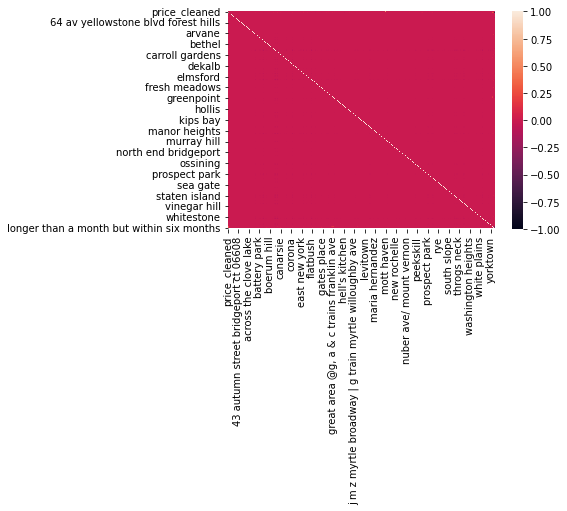

In [161]:
import seaborn as sns
# See correlatiuon heatmap
sns.heatmap(df.corr(),vmin=-1,vmax=1)